This is a public set of comments collected for spam research. It has five datasets composed of 1,956 real messages extracted from five videos. These five videos are popular pop songs that were among the 10 most viewed in the collection period.

All five datasets have the following attributes:

|Attribute | Attribute Explained |
| -- | -- |
| COMMENT_ID |	Unique ID representing the comment |
| AUTHOR | Author ID |
| DATE | Date the comment is posted |
| CONTENT | The comment |
| TAG | Attribute Explained |

In [3220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [3221]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/skynet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/skynet/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/skynet/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/skynet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

 ***1) Use any four of these five datasets to build a spam filter with the Naïve Bayes approach.***



In [3222]:
df_psy = pd.read_csv('~/UW/IMT_574/Week6/Homework/Youtube01-Psy.csv')
df_katy_perry = pd.read_csv('~/UW/IMT_574/Week6/Homework/Youtube02-KatyPerry.csv')
df_lmfao = pd.read_csv('~/UW/IMT_574/Week6/Homework/Youtube03-LMFAO.csv')
df_eminem = pd.read_csv('~/UW/IMT_574/Week6/Homework/Youtube04-Eminem.csv')
df_shakira = pd.read_csv('~/UW/IMT_574/Week6/Homework/Youtube05-Shakira.csv')

***Assuming Class=0 is not spam, Class=1 is spam***

In [3223]:
#Merging four of the datasets into a single one.
df_merged = pd.concat([df_psy,df_katy_perry, df_lmfao, df_shakira], axis = 0)

#Dropping unnecessary columns except CONTENT and CLASS
df_merged.drop(['COMMENT_ID','AUTHOR', 'DATE' ], axis = 1, inplace=True)

#renaming columns for easier manipulation
df_merged.rename(columns={"CONTENT":"COMMENT", "CLASS": "IS_SPAM"}, inplace=True)

df_merged.head()
# df_merged.shape

,COMMENT,IS_SPAM
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [3224]:
#Percentage of observations that are spam in training dataset
df_merged['IS_SPAM'].value_counts(normalize=True)

IS_SPAM
1    0.503979
0    0.496021
Name: proportion, dtype: float64

In [3225]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1508 entries, 0 to 369
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   COMMENT  1508 non-null   object
 1   IS_SPAM  1508 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 35.3+ KB


In [3226]:
#Cleaning the url links from comments
url_pattern = r'http\S+'

X_no_links = [re.sub(url_pattern," ",text) for text in df_merged["COMMENT"]]

In [3227]:
#Cleaning up data, by removing invalid characters, and leaving only aplhanumeric chars
regex_pattern = "[^a-zA-Z0-9]"

X_alphanums_only= [re.sub(regex_pattern," ",text) for text in X_no_links]

In [3228]:
#Converting the words to lowercase
X_lowercase = [text.lower() for text in X_alphanums_only]

In [3229]:
#Splitting the words into a list, by using the NLTK tokenizer
X_tokenized = [nltk.word_tokenize(text) for text in X_lowercase]

In [3230]:
#Lemmatizing the comments
#Lemmatization:  the process of grouping together the inflected forms of a word so they can be 
# analysed as a single item, identified by the word's lemma, or dictionary form.

#Lemmatization groups together different forms of a word, such as "builds", "building", and "built", and reduces them to a single base form, "build". 

lemmatizer = WordNetLemmatizer()

X_lemmatized = [[lemmatizer.lemmatize(word) for word in text] for text in X_tokenized]

In [3231]:
#Removing stopwords
#Stop words are words that are filtered out of natural language data because they are considered insignificant or uninformative
# i.e. "A, "An, "The, "In, "Of, "On, "Are, "Be, "If, and "Into.

stopwords = nltk.corpus.stopwords.words("english")

X_no_stopwords = [[word for word in text if word not in stopwords] for text in X_lemmatized]

In [3232]:
# print(X_no_stopwords[0])

In [3233]:
num_words = len(np.unique([word for text in X_no_stopwords for word in text]))

print(f'Number of unique words in the training dataset after clean up and formatting: {num_words}')


Number of unique words in the training dataset after clean up and formatting: 2780


In [3234]:
#Creating Bag of Words to be used in the NB model
#Bag-of-words(BoW) is a statistical language model used to analyze text and documents based on word count. 
# The bag-of-words model (BoW) is a model of text which uses a representation of text that is based on an unordered collection (a "bag") of words.
vectorizer = CountVectorizer(max_features=20000)

X_vectorized = vectorizer.fit_transform([" ".join(text) for text in X_no_stopwords]).toarray()

X_train,X_test,y_train,y_test = train_test_split(X_vectorized,np.asarray(df_merged["IS_SPAM"]),random_state=45,test_size=0.3)

In [3235]:
X_vectorized.shape

(1508, 2755)

In [3236]:
#Fitting the Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(X_train,y_train)

GaussianNB()

In [3237]:
model_nb.score(X_test, y_test)

0.7660044150110376

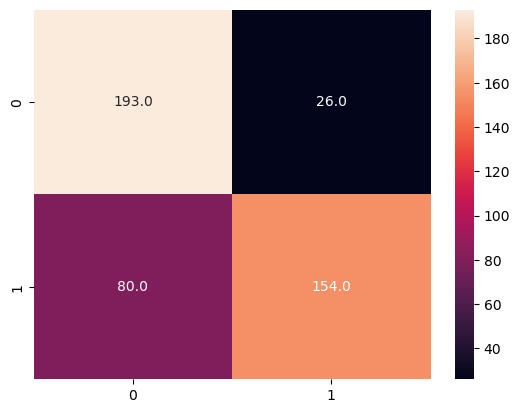

In [3238]:
#Plotting confusion matrix
y_pred = model_nb.predict(X_test)

conf = confusion_matrix(y_pred=y_pred,y_true=y_test)

sns.heatmap(conf,annot=True,fmt=".1f")
plt.show()

---

 ***2) Use that filter to check the accuracy of the remaining dataset.***

In [3239]:
#Creating a function to call the trained model
def predict_spam(comment):
    
    vector = vectorizer.transform([comment])
    spam_prediction = model_nb.predict(vector.toarray())
    
    return spam_prediction[0]

In [3240]:
#Using Eminem as the test dataset
#Adding new column with predicted result from NB model
df_eminem.drop(['COMMENT_ID','AUTHOR', 'DATE' ], axis = 1, inplace=True)
#renaming columns for easier manipulation

df_eminem.rename(columns={"CONTENT":"COMMENT", "CLASS": "IS_SPAM"}, inplace=True)

df_eminem['PREDICTED_CLASS']=df_eminem['COMMENT'].apply(predict_spam)

df_eminem.head()


,COMMENT,IS_SPAM,PREDICTED_CLASS
0,+447935454150 lovely girl talk to me xxx﻿,1,0
1,I always end up coming back to this song<br />﻿,0,0
2,"my sister just received over 6,500 new <a rel=...",1,1
3,Cool﻿,0,0
4,Hello I&#39;am from Palastine﻿,1,1


In [3241]:
#Calculate accuracy:

#Series variable with results of predicted vs real classification 
correct_preds = df_eminem['PREDICTED_CLASS'] == df_eminem['IS_SPAM']

#Accuracy = mean()
accuracy = correct_preds.mean()
print(f'Accuracy of the Naive Bayes model, using the test dataset: {accuracy}')

Accuracy of the Naive Bayes model, using the test dataset: 0.7611607142857143


---

 ***3) Make sure to report the details of your training and the model.***